In [200]:
import h5py
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
print(os.listdir("./Input/train"))

['images_training.h5', 'labels_training.h5']


In [201]:
with h5py.File('./Input/train/images_training.h5','r') as H:
    data_train = np.copy(H['datatrain'])
with h5py.File('./Input/train/labels_training.h5','r') as H:
    label_train = np.copy(H['labeltrain'])

# using H['datatest'], H['labeltest'] for test dataset.
print(data_train.shape,label_train.shape)

(30000, 784) (30000,)


In [202]:
with h5py.File('./Input/test/images_testing.h5','r') as H:
    data_test = np.copy(H['datatest'])
with h5py.File('./Input/test/labels_testing_2000.h5','r') as H:
    label_test = np.copy(H['labeltest'])
print(data_test.shape,label_test.shape)

(5000, 784) (2000,)


What does the dataset actually look like?

In [203]:
data_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00392157, 0.        , 0.00784314,
       0.        , 0.        , 0.35686275, 0.5372549 , 0.64705884,
       0.53333336, 0.        , 0.        , 0.00392157, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.69803923,
       0.80392164, 0.63529414, 0.7058824 , 0.8078432 , 0.8352942 ,
       0.00392157, 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.27450982, 0.85098046, 0.7725491 , 0.7411765 , 0.8862746 ,
       0.8431373 , 0.8313726 , 0.8313726 , 1.        , 0.28235

Seeing minimum and maximum values of dataset (all values seem to be between 0 and 1)

In [204]:
print(np.amax(data_train))
print(np.amin(data_train))

1.0
0.0


Visualising the dataset

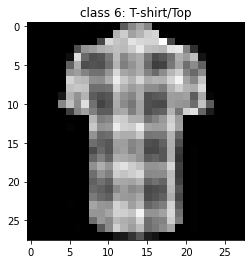

In [205]:
data_train_reshaped = data_train.reshape((data_train.shape[0], 28, 28))
plt.imshow(data_train_reshaped[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(label_train[0]) + ": T-shirt/Top" )
plt.show()

In [367]:
from sklearn.decomposition import PCA

Seeing how many dimensions we can reduce to using PCA first without losing too much variance

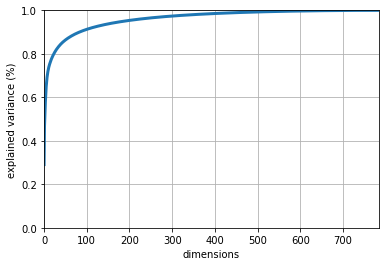

In [366]:
pca = PCA()
pca.fit(data_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance vs number of dimensions

plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 784, 0, 1]) 
plt.xlabel("dimensions")
plt.ylabel("explained variance (%)")
plt.grid(True)
plt.show()

100 dimensions seems to be a good amount and it still conserves 91.2% of the variance so looks good

In [368]:
d = np.argmax(cumsum >= 0.95) + 1

To get to 95% variance you need to add 87 more dimensions (not worth it, stay at 100 dimensions)

In [211]:
cumsum[100]

0.9127719

In [212]:
pca=PCA(n_components=100)
X_train_reduced = pca.fit_transform(data_train)
print("Reduced shape of training data: {}".format(str(X_train_reduced.shape)))
X_test_reduced = pca.transform(data_test)
print("Reduced shape of training data: {}".format(str(X_test_reduced.shape)))

Reduced shape of training data: (30000, 100)
Reduced shape of training data: (5000, 100)


Want to test how much image quality is lost from the compression (no significant quality lost from pca so can carry on)

Recovered shape of training data: (30000, 784)


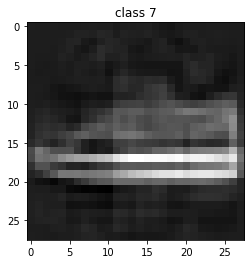

In [351]:
X_train_recovered = pca.inverse_transform(X_train_reduced)
print("Recovered shape of training data: {}".format(str(X_train_recovered.shape)))
import matplotlib.pyplot as plt
X_train_recovered = X_train_recovered.reshape((X_train_recovered.shape[0], 28, 28))
plt.imshow(X_train_recovered[1023], cmap=plt.get_cmap('gray'))
plt.title("class " + str(label_train[1023]))
plt.show()

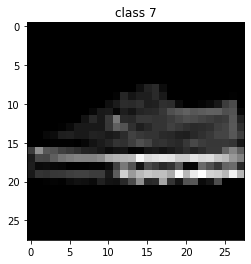

In [352]:
data_train_reshaped = data_train.reshape((data_train.shape[0], 28, 28))
plt.imshow(data_train_reshaped[1023], cmap=plt.get_cmap('gray'))
plt.title("class " + str(label_train[1023]) )
plt.show()

In [353]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

Random Forest Classifier Grid Search

In [219]:
param_grid_rf = {'n_estimators': [10,20,50,100,200],
              'max_depth': [10, 20]}
print("Parameter grid:\n{}".format(param_grid_rf))
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10,
                          return_train_score=True,verbose=4)
grid_search_rf.fit(X_train_reduced,label_train)


Parameter grid:
{'n_estimators': [10, 20, 50, 100, 200], 'max_depth': [10, 20]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .................max_depth=10, n_estimators=10; total time=   5.1s
[CV 2/10] END .................max_depth=10, n_estimators=10; total time=   5.1s
[CV 3/10] END .................max_depth=10, n_estimators=10; total time=   5.1s
[CV 4/10] END .................max_depth=10, n_estimators=10; total time=   5.0s
[CV 5/10] END .................max_depth=10, n_estimators=10; total time=   5.0s
[CV 6/10] END .................max_depth=10, n_estimators=10; total time=   5.1s
[CV 7/10] END .................max_depth=10, n_estimators=10; total time=   5.1s
[CV 8/10] END .................max_depth=10, n_estimators=10; total time=   5.0s
[CV 9/10] END .................max_depth=10, n_estimators=10; total time=   5.0s
[CV 10/10] END ................max_depth=10, n_estimators=10; total time=   5.1s
[CV 1/10] END .................max_depth=10, n_

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20],
                         'n_estimators': [10, 20, 50, 100, 200]},
             return_train_score=True, verbose=4)

In [220]:
print("Best parameters: {}".format(grid_search_rf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rf.best_score_))
print("Best estimator:\n{}".format(grid_search_rf.best_estimator_))

Best parameters: {'max_depth': 20, 'n_estimators': 200}
Best cross-validation score: 0.86
Best estimator:
RandomForestClassifier(max_depth=20, n_estimators=200)


In [316]:
print(grid_search_rf.cv_results_['mean_test_score'])
print(grid_search_rf.cv_results_['params'])
print(grid_search_rf.cv_results_['mean_test_score'][0:5])

[0.79906667 0.81456667 0.8228     0.82793333 0.82893333 0.82143333
 0.84476667 0.8545     0.8599     0.86133333]
[{'max_depth': 10, 'n_estimators': 10}, {'max_depth': 10, 'n_estimators': 20}, {'max_depth': 10, 'n_estimators': 50}, {'max_depth': 10, 'n_estimators': 100}, {'max_depth': 10, 'n_estimators': 200}, {'max_depth': 20, 'n_estimators': 10}, {'max_depth': 20, 'n_estimators': 20}, {'max_depth': 20, 'n_estimators': 50}, {'max_depth': 20, 'n_estimators': 100}, {'max_depth': 20, 'n_estimators': 200}]
[0.79906667 0.81456667 0.8228     0.82793333 0.82893333]


In [309]:
grid_search_rf.cv_results_['params'][0:5]

[{'max_depth': 10, 'n_estimators': 10},
 {'max_depth': 10, 'n_estimators': 20},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 200}]

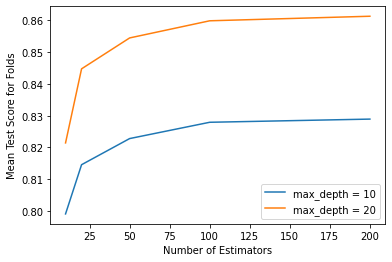

In [326]:
plt.plot([10,20,50,100,200],grid_search_rf.cv_results_['mean_test_score'][0:5],label="max_depth = 10")
plt.plot([10,20,50,100,200],grid_search_rf.cv_results_['mean_test_score'][5:10],label="max_depth = 20")
plt.ylabel("Mean Test Score for Folds")
plt.xlabel("Number of Estimators")
plt.legend(loc = "lower right")

K Nearest Neighbours Grid Search

In [229]:
param_grid_knn = {'n_neighbors': [3,5,7,9,11],
              'p': [1, 2]}
print("Parameter grid:\n{}".format(param_grid_knn))
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10,
                          return_train_score=True,verbose=4)
grid_search_knn.fit(X_train_reduced,label_train)


Parameter grid:
{'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ............................n_neighbors=3, p=1; total time=  10.5s
[CV 2/10] END ............................n_neighbors=3, p=1; total time=  10.5s
[CV 3/10] END ............................n_neighbors=3, p=1; total time=  11.1s
[CV 4/10] END ............................n_neighbors=3, p=1; total time=  10.2s
[CV 5/10] END ............................n_neighbors=3, p=1; total time=  10.2s
[CV 6/10] END ............................n_neighbors=3, p=1; total time=  10.3s
[CV 7/10] END ............................n_neighbors=3, p=1; total time=  10.7s
[CV 8/10] END ............................n_neighbors=3, p=1; total time=  10.2s
[CV 9/10] END ............................n_neighbors=3, p=1; total time=  10.4s
[CV 10/10] END ...........................n_neighbors=3, p=1; total time=  10.2s
[CV 1/10] END ............................n_neighbors=3, p=2; to

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]},
             return_train_score=True, verbose=4)

In [230]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))
print("Best estimator:\n{}".format(grid_search_knn.best_estimator_))

Best parameters: {'n_neighbors': 9, 'p': 1}
Best cross-validation score: 0.86
Best estimator:
KNeighborsClassifier(n_neighbors=9, p=1)


In [329]:
print(grid_search_knn.cv_results_['mean_test_score'])
print(grid_search_knn.cv_results_['params'])

[0.85483333 0.85076667 0.857      0.8547     0.85846667 0.8546
 0.85883333 0.85613333 0.85676667 0.85453333]
[{'n_neighbors': 3, 'p': 1}, {'n_neighbors': 3, 'p': 2}, {'n_neighbors': 5, 'p': 1}, {'n_neighbors': 5, 'p': 2}, {'n_neighbors': 7, 'p': 1}, {'n_neighbors': 7, 'p': 2}, {'n_neighbors': 9, 'p': 1}, {'n_neighbors': 9, 'p': 2}, {'n_neighbors': 11, 'p': 1}, {'n_neighbors': 11, 'p': 2}]


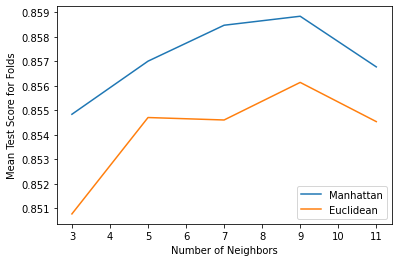

In [354]:
plt.plot([3,5,7,9,11],grid_search_knn.cv_results_['mean_test_score'][0:10:2],label="Manhattan")
plt.plot([3,5,7,9,11],grid_search_knn.cv_results_['mean_test_score'][1:11:2],label="Euclidean")
plt.ylabel("Mean Test Score for Folds")
plt.xlabel("Number of Neighbors")
plt.legend(loc = "lower right")

Support Vector Machine Grid Search

In [225]:
from sklearn.svm import SVC
param_grid_svc = {"C" : [0.1,1,10,100,1000],
              'kernel': ["rbf", "poly"]}
print("Parameter grid:\n{}".format(param_grid_svc))
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=10,
                          return_train_score=True,verbose=4)
grid_search_svc.fit(X_train_reduced,label_train)

Parameter grid:
{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'poly']}
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .............................C=0.1, kernel=rbf; total time=  48.3s
[CV 2/10] END .............................C=0.1, kernel=rbf; total time=  47.1s
[CV 3/10] END .............................C=0.1, kernel=rbf; total time=  46.9s
[CV 4/10] END .............................C=0.1, kernel=rbf; total time=  46.9s
[CV 5/10] END .............................C=0.1, kernel=rbf; total time=  47.2s
[CV 6/10] END .............................C=0.1, kernel=rbf; total time=  47.5s
[CV 7/10] END .............................C=0.1, kernel=rbf; total time=  47.1s
[CV 8/10] END .............................C=0.1, kernel=rbf; total time=  46.8s
[CV 9/10] END .............................C=0.1, kernel=rbf; total time=  47.1s
[CV 10/10] END ............................C=0.1, kernel=rbf; total time=  46.9s
[CV 1/10] END ............................C=0.1, kern

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'poly']},
             return_train_score=True, verbose=4)

In [226]:
print("Best parameters: {}".format(grid_search_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svc.best_score_))
print("Best estimator:\n{}".format(grid_search_svc.best_estimator_))

Best parameters: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score: 0.90
Best estimator:
SVC(C=10)


In [336]:
print(grid_search_svc.cv_results_['mean_test_score'])
print(grid_search_svc.cv_results_['params'])

[0.8413     0.80846667 0.88396667 0.87446667 0.8968     0.89343333
 0.88956667 0.88576667 0.88613333 0.8811    ]
[{'C': 0.1, 'kernel': 'rbf'}, {'C': 0.1, 'kernel': 'poly'}, {'C': 1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'poly'}, {'C': 10, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'poly'}, {'C': 100, 'kernel': 'rbf'}, {'C': 100, 'kernel': 'poly'}, {'C': 1000, 'kernel': 'rbf'}, {'C': 1000, 'kernel': 'poly'}]


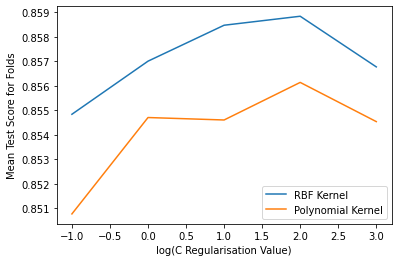

In [341]:
plt.plot([-1,0,1,2,3],grid_search_knn.cv_results_['mean_test_score'][0:10:2],label="RBF Kernel")
plt.plot([-1,0,1,2,3],grid_search_knn.cv_results_['mean_test_score'][1:11:2],label="Polynomial Kernel")
plt.ylabel("Mean Test Score for Folds")
plt.xlabel("log(C Regularisation Value)")
plt.legend(loc = "lower right")

Grid Search on Gradient Boosting (took too long so aborted)

In [227]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid_gbc = {'n_estimators': [10,20,50,100,200],
              'max_depth': [10, 20]}
print("Parameter grid:\n{}".format(param_grid_gbc))
grid_search_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, cv=10,
                          return_train_score=True,verbose=4)
grid_search_gbc.fit(X_train_reduced,label_train)

Parameter grid:
{'n_estimators': [10, 20, 50, 100, 200], 'max_depth': [10, 20]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .................max_depth=10, n_estimators=10; total time= 5.5min
[CV 2/10] END .................max_depth=10, n_estimators=10; total time= 5.5min
[CV 3/10] END .................max_depth=10, n_estimators=10; total time= 5.5min
[CV 4/10] END .................max_depth=10, n_estimators=10; total time= 5.5min
[CV 5/10] END .................max_depth=10, n_estimators=10; total time= 5.4min
[CV 6/10] END .................max_depth=10, n_estimators=10; total time= 5.5min
[CV 7/10] END .................max_depth=10, n_estimators=10; total time= 5.5min
[CV 8/10] END .................max_depth=10, n_estimators=10; total time= 5.5min
[CV 9/10] END .................max_depth=10, n_estimators=10; total time= 5.5min
[CV 10/10] END ................max_depth=10, n_estimators=10; total time= 5.5min
[CV 1/10] END .................max_depth=10, n_

KeyboardInterrupt: 

In [ ]:
print("Best parameters: {}".format(grid_search_gbc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_gbc.best_score_))
print("Best estimator:\n{}".format(grid_search_gbc.best_estimator_))

In [59]:
print(X_test.shape)

(2000, 784)


Grid Search on Adaboost (poor cross validation score so not used)

In [121]:
param_grid = {'n_estimators': [10, 50, 100, 200,500],
              'learning_rate': [0.5,1]}
print("Parameter grid:\n{}".format(param_grid))
grid_search_adaboost = GridSearchCV((AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), random_state=42)), param_grid, cv=10,
                          return_train_score=True,verbose=4)
grid_search_adaboost.fit(X_train_reduced,label_train)

Parameter grid:
{'n_estimators': [10, 50, 100, 200, 500], 'learning_rate': [0.5, 1]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ............learning_rate=0.5, n_estimators=10; total time=  10.3s
[CV 2/10] END ............learning_rate=0.5, n_estimators=10; total time=  10.1s
[CV 3/10] END ............learning_rate=0.5, n_estimators=10; total time=  10.0s
[CV 4/10] END ............learning_rate=0.5, n_estimators=10; total time=  10.0s
[CV 5/10] END ............learning_rate=0.5, n_estimators=10; total time=  10.1s
[CV 6/10] END ............learning_rate=0.5, n_estimators=10; total time=  10.0s
[CV 7/10] END ............learning_rate=0.5, n_estimators=10; total time=  10.0s
[CV 8/10] END ............learning_rate=0.5, n_estimators=10; total time=  10.0s
[CV 9/10] END ............learning_rate=0.5, n_estimators=10; total time=  10.0s
[CV 10/10] END ...........learning_rate=0.5, n_estimators=10; total time=  10.0s
[CV 1/10] END ............learning_rate=0.

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             param_grid={'learning_rate': [0.5, 1],
                         'n_estimators': [10, 50, 100, 200, 500]},
             return_train_score=True, verbose=4)

In [123]:
print("Best parameters: {}".format(grid_search_adaboost.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_adaboost.best_score_))
print("Best estimator:\n{}".format(grid_search_adaboost.best_estimator_))

Best parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.58
Best estimator:
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100, random_state=42)


Fitting Optimal Classifiers

In [243]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

KNN Training and Evaluation

In [360]:
%%time
knn_model = KNeighborsClassifier(n_neighbors=9, p=1)
knn_model.fit(X_train_reduced,label_train)

Wall time: 11.9 ms


KNeighborsClassifier(n_neighbors=9, p=1)

In [361]:
%%time
predictions_knn = knn_model.predict(X_test_reduced[0:2000])
print(classification_report(label_test,predictions_knn))
print(confusion_matrix(label_test,predictions_knn))
print("Accuracy Score: {}".format(accuracy_score(label_test,predictions_knn)))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       192
           1       0.99      0.98      0.99       184
           2       0.75      0.78      0.76       206
           3       0.84      0.82      0.83       207
           4       0.75      0.72      0.73       220
           5       0.99      0.86      0.92       190
           6       0.61      0.61      0.61       190
           7       0.90      0.93      0.91       192
           8       0.95      0.95      0.95       227
           9       0.89      0.97      0.93       192

    accuracy                           0.84      2000
   macro avg       0.85      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000

[[157   0   4   4   3   1  19   0   4   0]
 [  1 181   0   2   0   0   0   0   0   0]
 [  5   0 161   5  17   0  18   0   0   0]
 [  5   1   3 169  14   0  13   0   2   0]
 [  0   0  28  14 158   0  20   0   0   0]
 [  0   0   0   1   0 164 

Random Forest Classifier Training and Evaluation

In [358]:
%%time
rf_model = RandomForestClassifier(max_depth=20, n_estimators=100)
rf_model.fit(X_train_reduced,label_train)

Wall time: 1min 28s


RandomForestClassifier(max_depth=20)

In [359]:
%%time
predictions_rf = rf_model.predict(X_test_reduced[0:2000])
print(classification_report(label_test,predictions_rf))
print(confusion_matrix(label_test,predictions_rf))
print("Accuracy Score: {}".format(accuracy_score(label_test,predictions_rf)))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       192
           1       0.99      0.98      0.99       184
           2       0.77      0.80      0.78       206
           3       0.86      0.83      0.85       207
           4       0.78      0.78      0.78       220
           5       0.91      0.92      0.91       190
           6       0.67      0.60      0.63       190
           7       0.92      0.90      0.91       192
           8       0.93      0.95      0.94       227
           9       0.90      0.96      0.93       192

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

[[160   0   3   4   4   1  14   0   6   0]
 [  1 180   1   2   0   0   0   0   0   0]
 [  3   0 164   3  20   0  16   0   0   0]
 [  9   1   5 172   8   0  11   0   1   0]
 [  1   0  21  12 171   1  12   0   2   0]
 [  0   0   0   0   0 175 

Support Vector Machine Evaluation

In [356]:
%%time
#RUN CELL
svm_model = SVC(C=10)
svm_model.fit(X_train_reduced,label_train)

Wall time: 46.4 s


SVC(C=10)

In [357]:
%%time
predictions_svm = svm_model.predict(X_test_reduced[0:2000])
print(classification_report(label_test,predictions_svm))
print(confusion_matrix(label_test,predictions_svm))
print("Accuracy Score: {}".format(accuracy_score(label_test,predictions_svm)))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       192
           1       0.99      0.99      0.99       184
           2       0.79      0.82      0.80       206
           3       0.85      0.86      0.85       207
           4       0.84      0.79      0.81       220
           5       0.98      0.98      0.98       190
           6       0.72      0.70      0.71       190
           7       0.94      0.96      0.95       192
           8       0.96      0.98      0.97       227
           9       0.97      0.96      0.97       192

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.88      0.89      0.88      2000

[[160   1   2   5   0   0  20   0   4   0]
 [  0 182   0   2   0   0   0   0   0   0]
 [  6   0 168   4  15   0  13   0   0   0]
 [  9   0   5 177  10   0   4   0   2   0]
 [  0   0  21  12 173   0  14   0   0   0]
 [  0   0   0   0   0 186 

FOR RUNNING ON TEST DATA

In [377]:
%%time
import h5py
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
print(os.listdir("./Input/train"))

['images_training.h5', 'labels_training.h5']
Wall time: 2.29 ms


In [378]:
%%time
with h5py.File('./Input/train/images_training.h5','r') as H:
    data_train = np.copy(H['datatrain'])
with h5py.File('./Input/train/labels_training.h5','r') as H:
    label_train = np.copy(H['labeltrain'])

# using H['datatest'], H['labeltest'] for test dataset.
print(data_train.shape,label_train.shape)

(30000, 784) (30000,)
Wall time: 124 ms


In [379]:
%%time
with h5py.File('./Input/test/images_testing.h5','r') as H:
    data_test = np.copy(H['datatest'])
with h5py.File('./Input/test/labels_testing_2000.h5','r') as H:
    label_test = np.copy(H['labeltest'])
print(data_test.shape,label_test.shape)

(5000, 784) (2000,)
Wall time: 43.1 ms


In [380]:
%%time
from sklearn.decomposition import PCA

Wall time: 0 ns


In [381]:
%%time
pca=PCA(n_components=100)
X_train_reduced = pca.fit_transform(data_train)
print("Reduced shape of training data: {}".format(str(X_train_reduced.shape)))
X_test_reduced = pca.transform(data_test)
print("Reduced shape of training data: {}".format(str(X_test_reduced.shape)))

Reduced shape of training data: (30000, 100)
Reduced shape of training data: (5000, 100)
Wall time: 2.82 s


In [382]:
%%time
from sklearn.svm import SVC

Wall time: 0 ns


In [383]:
%%time
svm_model = SVC(C=10)
svm_model.fit(X_train_reduced,label_train)

Wall time: 45.2 s


SVC(C=10)

In [384]:
%%time
output = svm_model.predict(X_test_reduced)

Wall time: 21.6 s


In [385]:
%%time
# assume output is the predicted labels from classifiers
# (5000,)
with h5py.File('Output/predicted_labels2.h5','w') as H:
    H.create_dataset('Output',data=output)

Wall time: 55.1 ms
